In [9]:
import numpy as np
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
import pandas as pd
import sklearn.linear_model as lm

# Rename and Resize the images

In [3]:
path='.\data\cat'

In [2]:
count=0
for i in os.listdir(path):
    src=os.path.join(path,i)
    dst=os.path.join(path,count.__str__()+'.jpg')
    os.rename(src,dst)
    count+=1

In [4]:
width_list=[]
height_list=[]
name_list=[]
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    width,height=img.size
    width_list.append(width)
    height_list.append(height)
    name_list.append(i)
info_df=pd.DataFrame({"name":name_list,"width":width_list,"height":height_list})

In [5]:
info_df

,name,width,height
0,0.jpg,375,500
1,1.jpg,500,375
2,10.jpg,500,408
3,100.jpg,1024,768
4,1000.jpg,500,334
...,...,...,...
9992,9992.jpg,387,500
9993,9993.jpg,500,375
9994,9994.jpg,357,500
9995,9995.jpg,500,333


In [6]:
info_df.describe()

,width,height
count,9997.000000,9997.000000
mean,604.832950,520.309993
std,237.214102,208.772235
min,135.000000,101.000000
25%,500.000000,375.000000
50%,500.000000,447.000000
75%,768.000000,683.000000
max,1024.000000,1024.000000


<Axes: xlabel='height'>

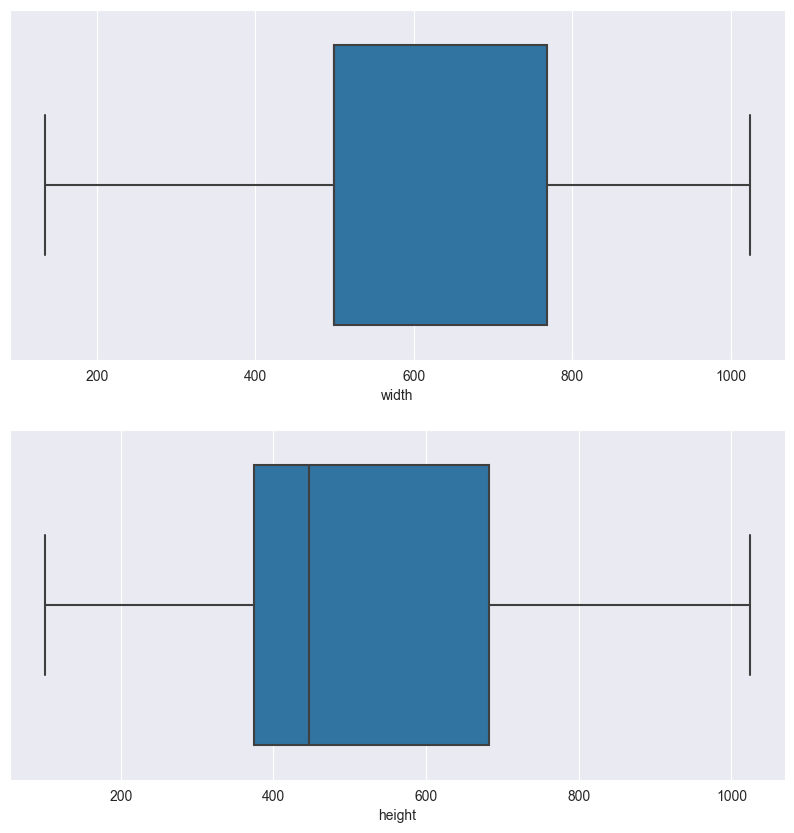

In [7]:
f,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x="width",data=info_df,ax=ax[0])
sns.boxplot(x="height",data=info_df,ax=ax[1])

<Axes: xlabel='width', ylabel='height'>

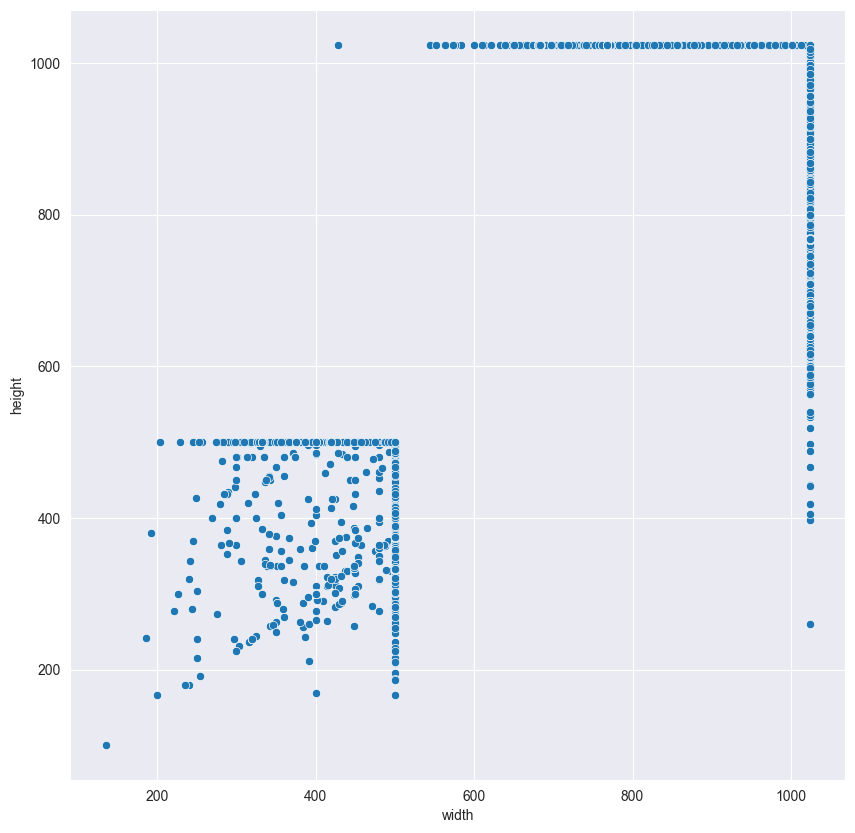

In [8]:
f=plt.figure(figsize=(10,10))
sns.scatterplot(x="width",y="height",data=info_df)

In [10]:
lr=lm.LinearRegression()
lr.fit(np.array(info_df["width"]).reshape(-1,1),np.array(info_df["height"]).reshape(-1,1))

LinearRegression()

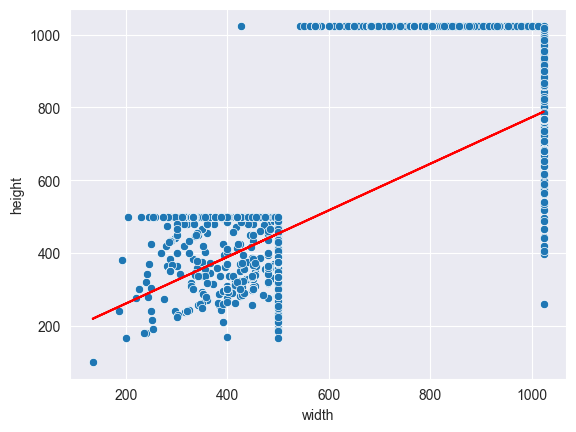

In [11]:
sns.scatterplot(x="width",y="height",data=info_df)
plt.plot(np.array(info_df["width"]),lr.predict(np.array(info_df["width"]).reshape(-1,1)),color="red")

In [12]:
print(lr.coef_,lr.intercept_)

[[0.63973425]] [133.3776412]


In [13]:
info_df.describe()

,width,height
count,9997.000000,9997.000000
mean,604.832950,520.309993
std,237.214102,208.772235
min,135.000000,101.000000
25%,500.000000,375.000000
50%,500.000000,447.000000
75%,768.000000,683.000000
max,1024.000000,1024.000000
